Markowitz efficient frontier states investors should consider multiple securties in a portfolio rather than individually. A portfolio that contains combination of securties with low correlation can benefit from a diversificaiton effect. Meaning investors can optimize their return without assuming additional risk. Markowitz 

We will consider 6 portfolios containing 2 of the same securties but weighted differently to test this theory. Assuming the following the expected return for one secirity is "Chipolte ["CMG"]" 7% and the other is 8% Facebook["FB"]. We will base our analysis from 2007to current. 

We will need to test the correlation of the two stocks first to see if they will belefit from a diversification effect

In [1]:
import pandas as pd 
import numpy as np 
from pandas_datareader import data as web
import matplotlib.pyplot as plt

In [2]:
#get data for companies
port_Companies = ["FB", "CMG"]
port_data = pd.DataFrame()
for t in port_Companies:
    port_data[t] = web.DataReader(t, data_source = "yahoo", start = "2007-1-1")["Adj Close"]

In [3]:
#data points review -> data collected for 3752 days. Which matches for both securties
port_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1896 entries, 2012-05-18 to 2019-11-29
Data columns (total 2 columns):
FB     1896 non-null float64
CMG    1896 non-null float64
dtypes: float64(2)
memory usage: 44.4 KB


In [4]:
#see the adj close for the last 5 days 
port_data.tail()

,FB,CMG
Date,,
2019-11-22,198.820007,772.609985
2019-11-25,199.789993,786.510010
2019-11-26,198.970001,815.840027
2019-11-27,202.000000,816.750000
2019-11-29,201.639999,813.919983


we will look at the correlation between both securties and to see if they will benefit from the diversification effect proposed my markowitz

In [5]:
port_data.corr()

,FB,CMG
FB,1.000000,0.196491
CMG,0.196491,1.000000


There is a 19% correlation between Chipolte and Facebook. Though there is some correlation, it is low enough to belefit from the diversificaiton effect proposed by Markowitz. to Test this theory we will set up 6 different portfolios containing the same securties but weighted differently. 

In [6]:
weights_1 = np.array([1.0, 0.0])
weights_2 = np.array([0.8, 0.2])
weights_3 = np.array([0.6, 0.4])
weights_4 = np.array([0.4, 0.6])
weights_5 = np.array([0.2, 0.8])
weights_6 = np.array([0.0, 1.0])

In [7]:
expected_return_FB = 0.08
expected_return_CMG = 0.07

In [8]:
#lets calculate the simple returns for each secutity
simple_return  = (port_data/port_data.shift(1)) -1 

In [9]:
simple_return.tail()

,FB,CMG
Date,,
2019-11-22,0.004497,-0.001099
2019-11-25,0.004879,0.017991
2019-11-26,-0.004104,0.037291
2019-11-27,0.015228,0.001115
2019-11-29,-0.001782,-0.003465


This reflects the daily changes for each security in the portfolio. We will use this to calculate the volatility of each security 

In [10]:
FB_Vol = (simple_return["FB"].var() * 250) ** 0.5
print(f"Facebook volatility for the given peroid is {round(FB_Vol, 3) * 100} %")

Facebook volatility for the given peroid is 36.199999999999996 %


In [11]:
CMG_Vol = (simple_return["CMG"].var() * 250) ** 0.5
print(f"Chipolte volatility for the given peroid is {round(CMG_Vol, 3) * 100} %")

Chipolte volatility for the given peroid is 33.7 %


We will calculate the expected retrun for the portfolio using the expected return and the weights

In [12]:
allPortSTd = []

In [13]:
allPortER = []

In [14]:
port_1_ER = (expected_return_FB * weights_1[0]) + (expected_return_CMG * weights_1[1])
allPortER.append(port_1_ER)
print(f"Expected return for portfolio 1 is {port_1_ER * 100} %")

Expected return for portfolio 1 is 8.0 %


In [15]:
std_port_1 = np.dot(weights_1.T, np.dot(simple_return.cov() * 250, weights_1)) ** 0.5
allPortSTd.append(std_port_1)
print(f"Standard deviation of portfolio 1 is {round(std_port_1, 2) * 100}")

Standard deviation of portfolio 1 is 36.0


In [16]:
port_2_ER = (expected_return_FB * weights_2[0]) + (expected_return_CMG * weights_2[1])
allPortER.append(port_2_ER)
print(f"Expected return for portfolio 2 is {port_2_ER * 100} %")

Expected return for portfolio 2 is 7.8 %


In [17]:
std_port_2 = np.dot(weights_2.T, np.dot(simple_return.cov() * 250, weights_2)) ** 0.5
allPortSTd.append(std_port_2)
print(f"Standard devation of port 2 is {round(std_port_2, 2) * 100}")

Standard devation of port 2 is 31.0


In [18]:
port_3_ER = (expected_return_FB * weights_3[0]) + (expected_return_CMG * weights_3[1])
allPortER.append(port_3_ER
                )
print(f"the expected return for port 3 is {round(port_3_ER, 3) * 100}")

the expected return for port 3 is 7.6


In [19]:
std_port3 = np.dot(weights_3.T, np.dot(simple_return.cov() * 250, weights_3)) ** 0.5
allPortSTd.append(std_port3)
print(f"The stadard deviation od port 3 is {std_port3 * 100}")

The stadard deviation od port 3 is 27.526991894428743


In [20]:
port_4_ER = (expected_return_FB * weights_4[0]) + (expected_return_CMG * weights_4[1])
allPortER.append(port_4_ER)
print(f"The Expected return for port 4 is {port_4_ER * 100}")

The Expected return for port 4 is 7.400000000000001


In [21]:
std_port_4 = np.dot(weights_4.T, np.dot(simple_return.cov() * 250 , weights_4)) ** 0.5
allPortSTd.append(std_port_4)
print(f"The standart deviation for port 4 is {std_port_4 * 100}")

The standart deviation for port 4 is 26.89089327695547


In [22]:
port_5_Er = (expected_return_FB * weights_5[0]) + (expected_return_CMG * weights_5[1])
allPortER.append(port_5_Er)
print(f"THe expected return for port 5 is {port_5_Er * 100}")

THe expected return for port 5 is 7.200000000000001


In [23]:
std_port_5 = np.dot(weights_5.T, np.dot(simple_return.cov() * 250 , weights_5)) ** 0.5
allPortSTd.append(std_port_5)
print(f"The Std of port 5 is {std_port_5 * 100}")

The Std of port 5 is 29.13984446437871


In [24]:
port_6_ER = (expected_return_FB * weights_6[0]) + (expected_return_CMG * weights_6[1])
allPortER.append(port_6_ER)
print(f"The expected return for port 6 is {port_6_ER * 100}")

The expected return for port 6 is 7.000000000000001


In [25]:
std_port_6 = np.dot(weights_5.T, np.dot(simple_return.cov() * 250 , weights_6)) ** 0.5
allPortSTd.append(std_port_6)
print(f"The standard deviation for port 6 is {std_port_6 * 100}")

The standard deviation for port 6 is 30.85923065179521


In [26]:
print(allPortER)

[0.08, 0.078, 0.07600000000000001, 0.07400000000000001, 0.07200000000000001, 0.07]


In [27]:
print(allPortSTd)

[0.361779238334561, 0.3087030871206495, 0.27526991894428743, 0.2689089327695547, 0.2913984446437871, 0.3085923065179521]


In [28]:
# LEts plot these on a scatter plot to get a visual of Markowitz theory

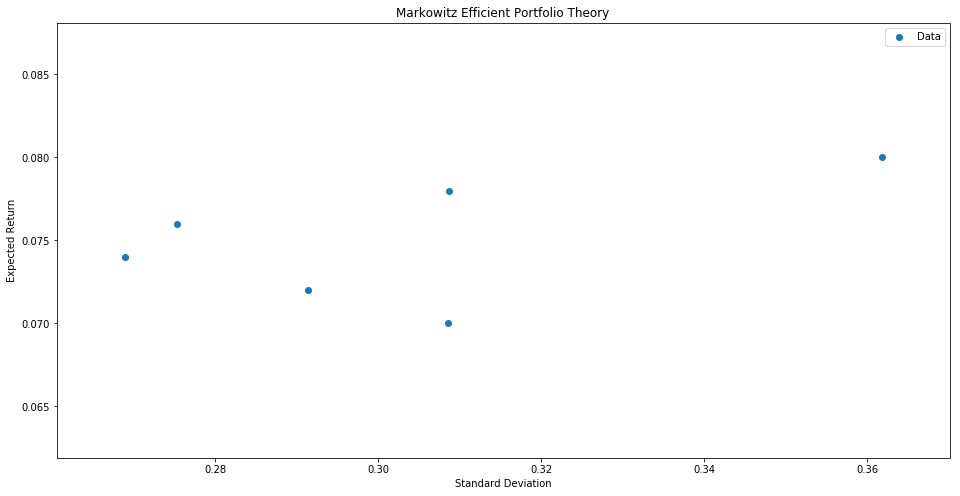

In [29]:
plt.figure(figsize= (16,8))
plt.scatter(allPortSTd, allPortER, label = "Data")
plt.xlabel("Standard Deviation")
plt.ylabel("Expected Return")
plt.title("Markowitz Efficient Portfolio Theory")
plt.legend()
plt.show()

The x_Axis will contain the risk of each portfolio and the y_axis will contain the expected return for each portfolio. This provides you the typical shape of a markowitz efficient frontier. There a a set of effieicnet portfolios that can provide a hight expected rate or return for the same or lower amount of risk. This is the "EFFIEICENT PORTFOLIO". The Frontier starting point is the minimum variance portfolio. The Lowest risk an investor could bare. 